# Ejercicio 4. Recursividad

## Introducción
Su trabajo es resolver el siguiente rompecabezas.

<center>
<img src="https://cdn.kastatic.org/ka-perseus-images/5b5fb2670c9a185b2666637461e40c805fcc9ea5.png">
</center>

Usted tiene tres postes y un número de discos $N$ de diferentes tamaños que pueden deslizarse en cualquier poste. El rompecabezas comienza con los discos apilados de manera cónica en un poste, con el disco más grande en la parte inferior y el más pequeño en la parte superior. 

El objetivo del juego es mover toda la pila a otro poste, siguiendo estas simples reglas:

1. Solo se puede mover un disco a la vez.
2. Cada movimiento consiste en tomar el disco superior de una de las pilas y colocarlo en la parte superior de otra pila.
3. No se puede colocar un disco más grande encima de un disco más pequeño.

En internet puede encontrar el juego de forma interactiva [aquí](https://www.mathplayground.com/logic_tower_of_hanoi.html)

> Para la solución de este ejercicio, vamos a hacer uso de las funciones del archivo `utils.py` de esta misma carpeta. A continuación se le mostrará como funciona el código que hará su trabajo más sencillo.

In [1]:
# No es necesario modificar este código

# Vamos a importar unas funciones auxiliares que se encuentran en utils.py y van a ayudar a solucionar el taller 
from utils import movimiento, dibujar_torres

# El disco 3 es el más grande y la base de la torre. El disco dos es el mediano y el 1 está en el tope de la torre.
N = 3

posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

posiciones_iniciales

{'A': [3, 2, 1], 'B': [], 'C': []}

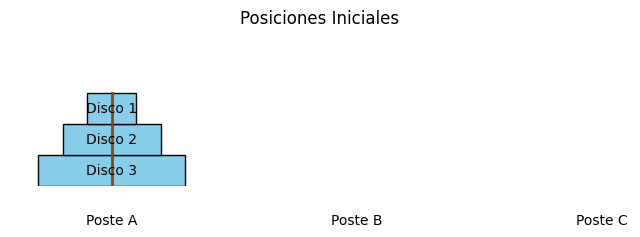

In [2]:
# Dibujar las posiciones iniciales
dibujar_torres(posiciones_iniciales, titulo = 'Posiciones Iniciales')

In [3]:
# Utilizamos la función movimiento para mover la ficha 1 del poste A hacia C
posiciones_finales = movimiento(posiciones_iniciales, ('A', 'C', 1))
posiciones_finales

{'A': [3, 2], 'B': [], 'C': [1]}

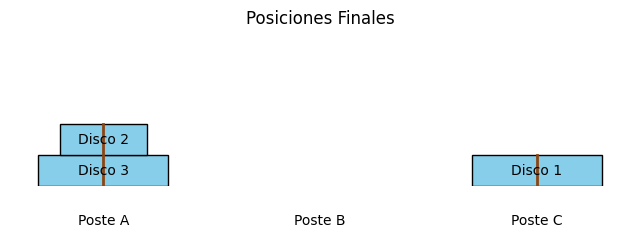

In [4]:
# Dibujar las posiciones finales (asegúrate de tener posiciones_finales actualizadas)
dibujar_torres(posiciones_finales, titulo = 'Posiciones Finales')

Note que en el ejemplo anterior se utilizaron dos funciones:

- `movimiento(posiciones_iniciales, movimiento)`: Esta función recibe dos argumentos: 
    (i) `posiciones_iniciales` que es un diccionario donde se especifica para cada poste, la lista de discos apilada en él. Cada lista de discos va desde el objeto que está en la base hasta el objeto que va en la cima.
    (ii) `movimiento` que es una tupla de tres elementos `(poste_inicial, poste_final, disco)`. Esta tupla específica que `disco` se va a remover del `poste_inicial` y en qué `poste_final` se va a ubicar.
- `dibujar_torres(posiciones, titulo)`: Esta función gráfica el estado del juego para unas `posiciones` dadas en el formato de tupla descrito anteriormente. Además se le puede poner un título al gráfico.

In [5]:
# Note que en caso de tratar de hacer un movimiento no permitido, la función arrojará un error y su debida explicación.
posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

# En este caso no puedo remover el disco 2 del poste A porque no es el disco de la cima.
movimiento(posiciones_iniciales, ('A', 'C', 2))

MovimientoInvalidoError: Movimiento invalido. El disco 2 no está en la cima del poste A.

In [8]:
# Este otro error muestra que si tomamos el Disco 2, no lo podemos poner sobre el Disco 1
posiciones_iniciales = {'A': [3, 2], 'B': [], 'C': [1]} 
movimiento(posiciones_iniciales, ('A', 'C', 2))

MovimientoInvalidoError: Movimiento invalido. El disco 2 es más grande que el disco 1 que está en la cima del poste C.

Habiendo entendido este problema y las funciones que tiene para resolverlo, resuelva los siguientes dos puntos:

### 1. Caso base.
Suponga que $N = 3$. 

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/tower-of-hanoi.png">
</center>

Cree una secuencia de tuplas que digan la secuencia de movimientos que llevan la Torre del poste A al C cumpliendo con todas las reglas del enunciado.

Las tuplas deben seguir el siguiente formato `(poste inicial, poste final, disco)`. Por ejemplo, llevar el disco 1 del poste A al C (tal como se muestra en la figura de arriba) sería `("A", "C", 1)`.

La siguiente función recibirá una lista de movimientos (tuplas) y ejecutará los movimientos. Esta lanzará un mensaje en caso de hacer algún movimiento no permitido.

La respuesta esperada debe ser algo del siguiente estilo:

```python
respuesta = [("A", "C", 1), ("A", "B", 2), ...]
```

In [38]:
posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

### 2. Caso base con función.
Cree una función que le ayude a encontrar la lista de movimientos para solucionar el problema con la menor cantidad de movimientos posible. Esta función debe servir para generalizar la solución para cualquier $N$ entero positivo.

In [43]:
# Usando recursión
def TorreDeHanoi(N, poste_inicial, poste_final, poste_auxiliar):
    movimientos = []
    if N == 0:
        return movimientos
    # Llamada recursiva para mover N-1 discos al poste auxiliar
    movimientos += TorreDeHanoi(N - 1, poste_inicial, poste_auxiliar, poste_final)
    # Mover el N-ésimo disco al poste final
    movimientos.append((poste_inicial, poste_final, N))
    # Llamada recursiva para mover los N-1 discos al poste final
    movimientos += TorreDeHanoi(N - 1, poste_auxiliar, poste_final, poste_inicial)
    return movimientos

respuesta = TorreDeHanoi(N = 3, poste_inicial = 'A', poste_final = 'C', poste_auxiliar = 'B')
respuesta

[('A', 'C', 1),
 ('A', 'B', 2),
 ('C', 'B', 1),
 ('A', 'C', 3),
 ('B', 'A', 1),
 ('B', 'C', 2),
 ('A', 'C', 1)]

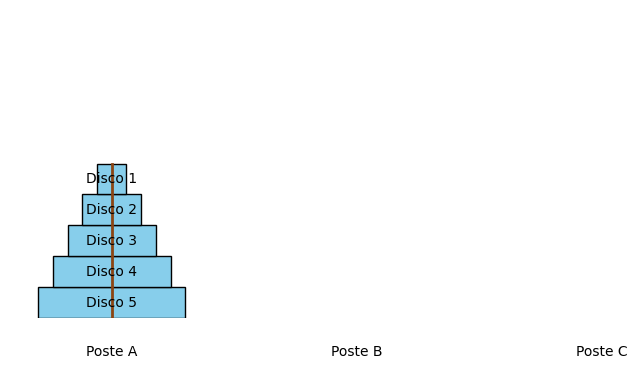

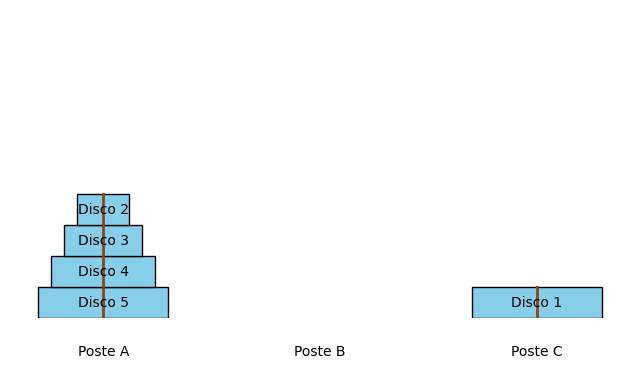

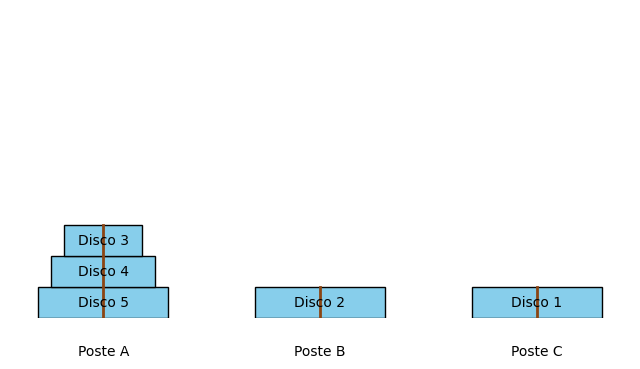

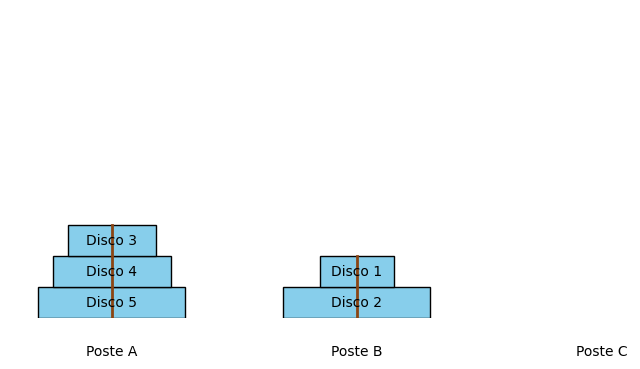

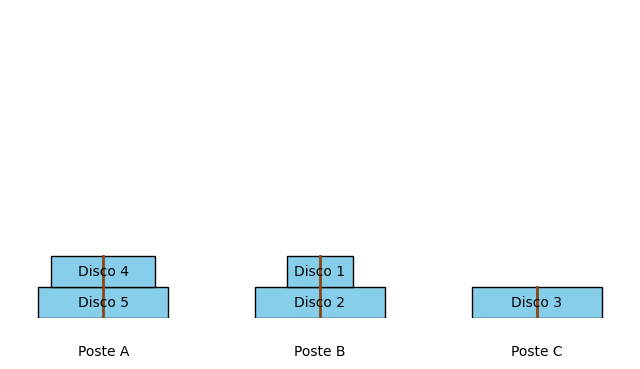

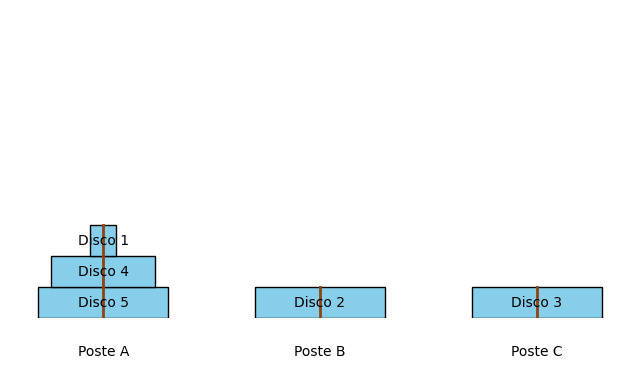

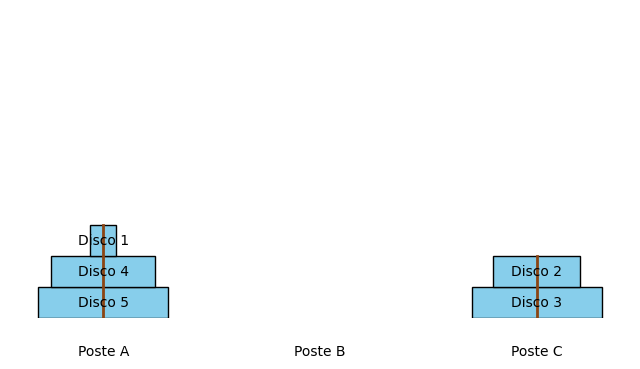

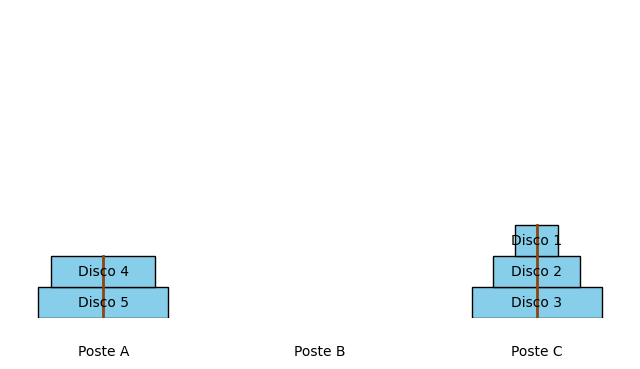

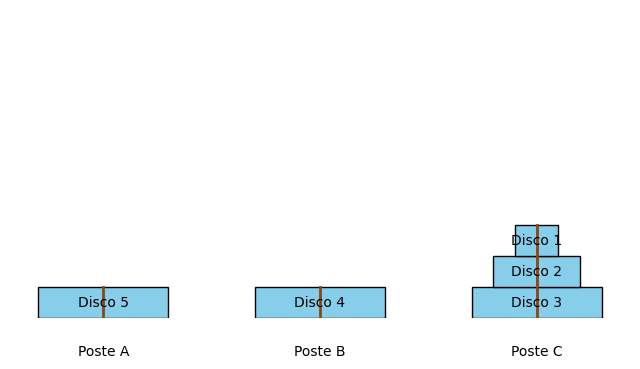

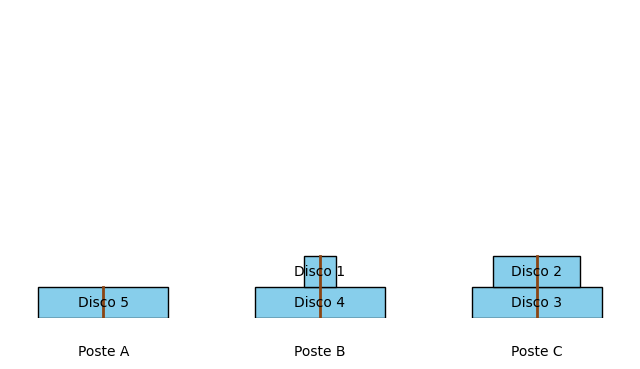

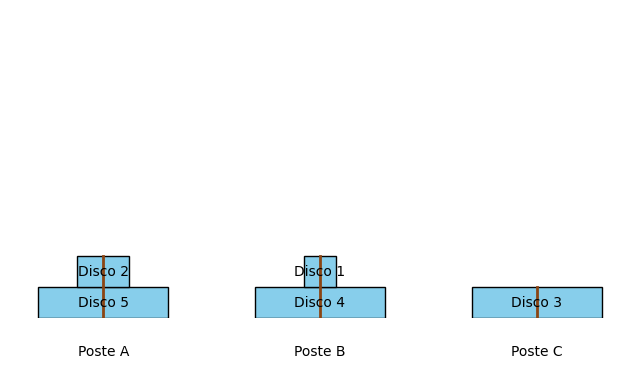

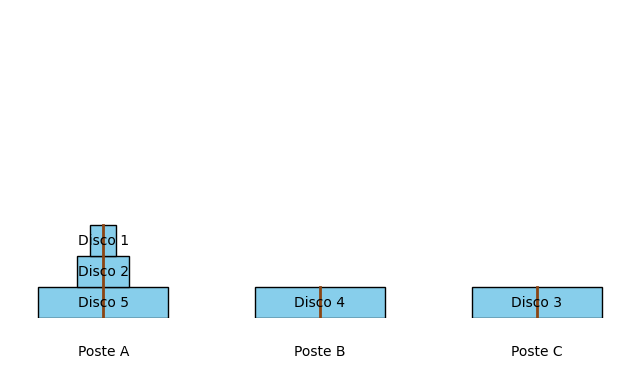

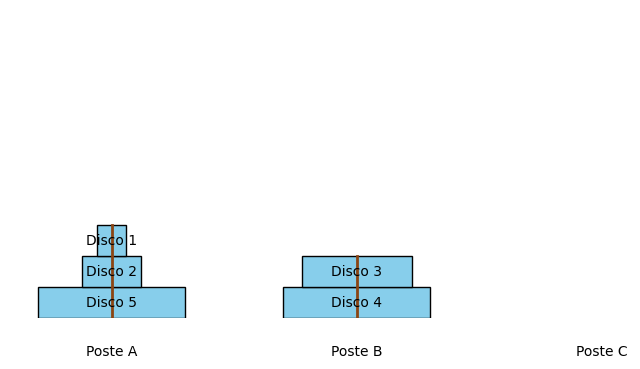

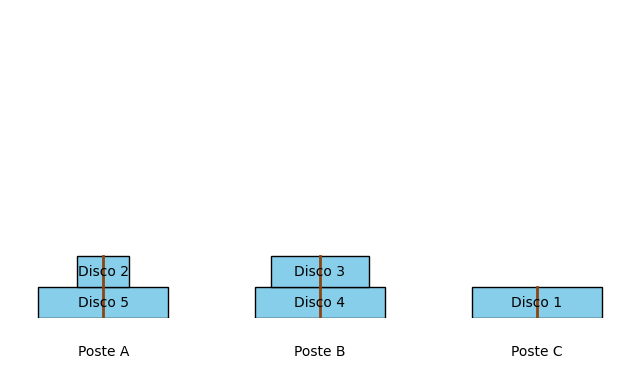

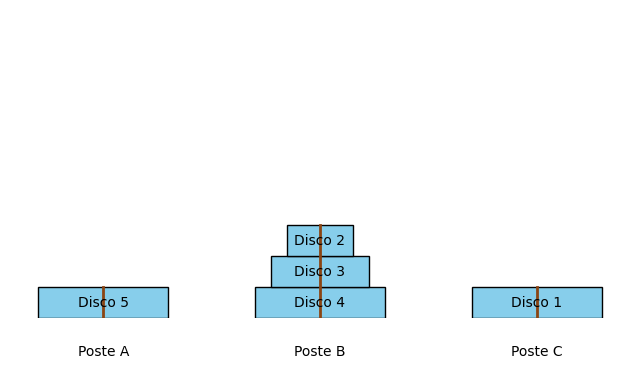

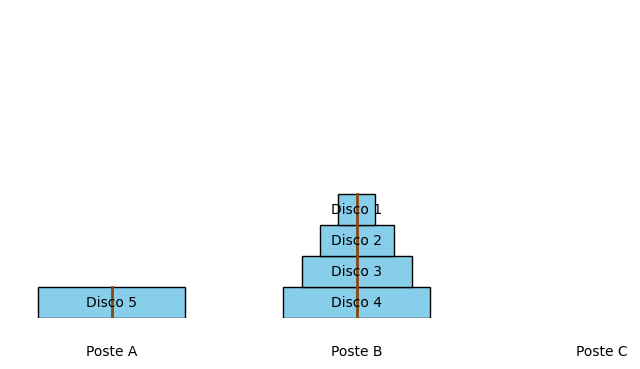

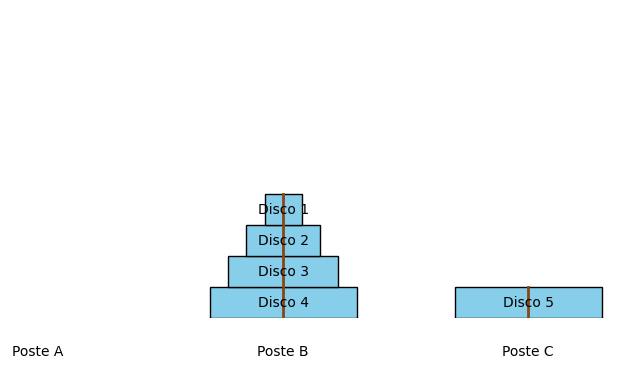

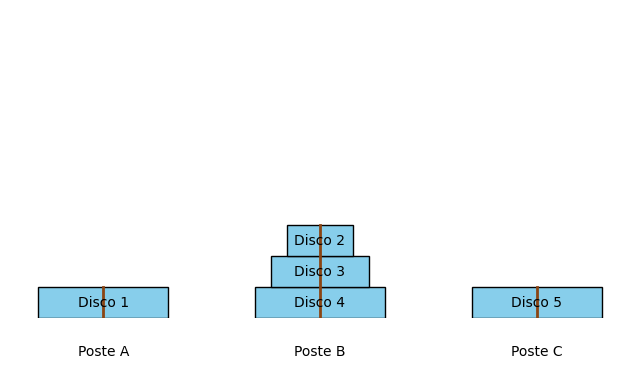

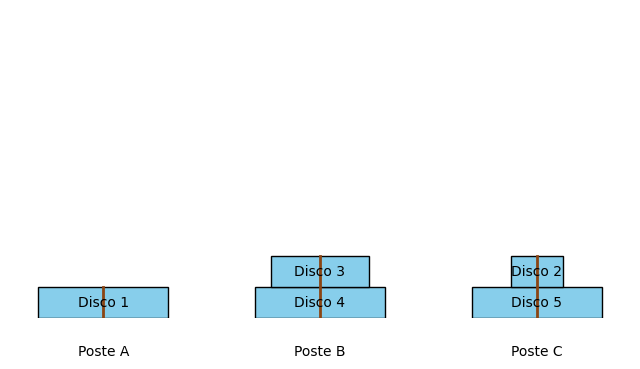

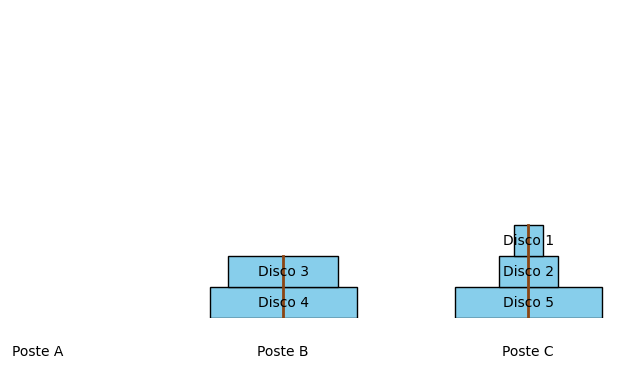

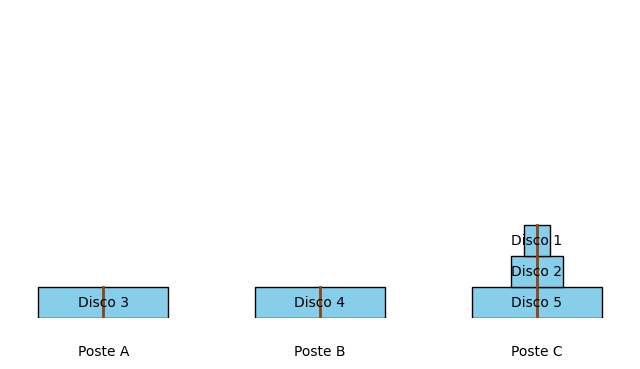

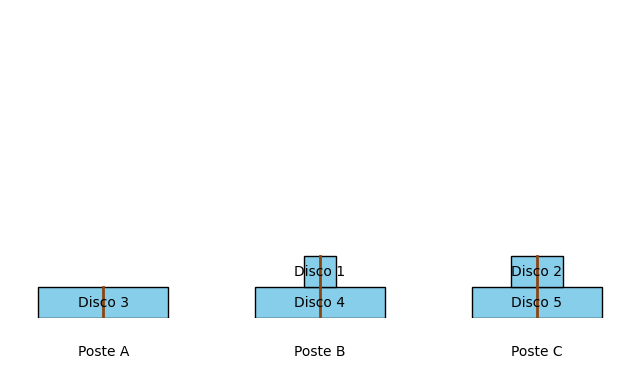

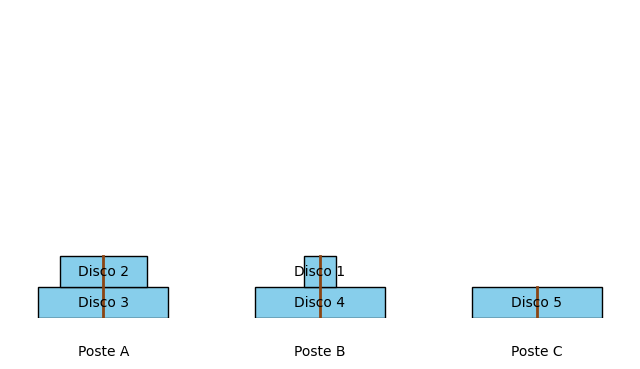

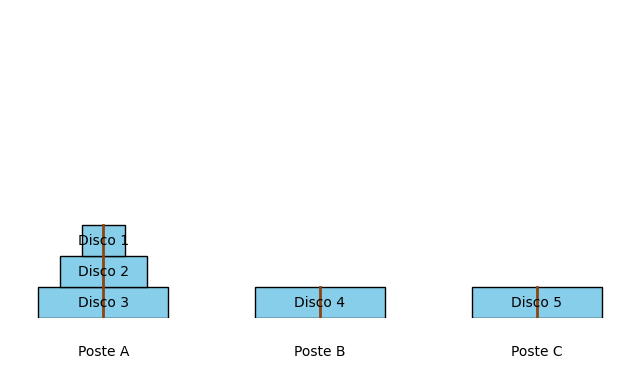

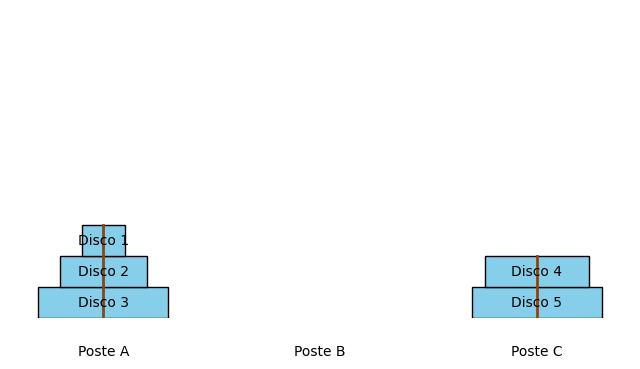

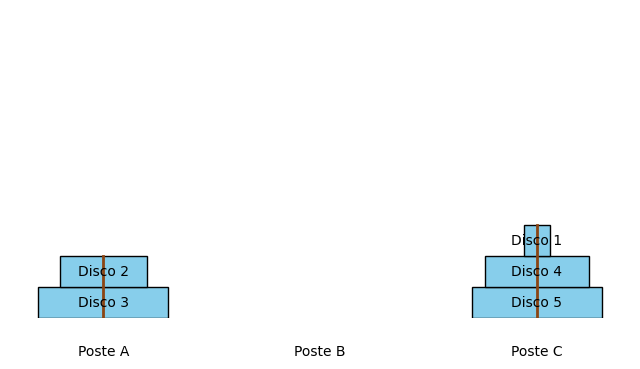

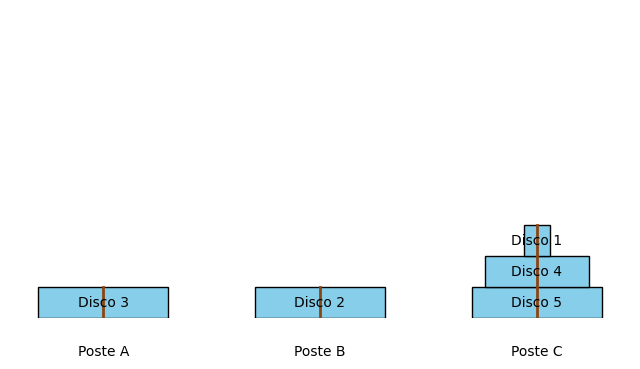

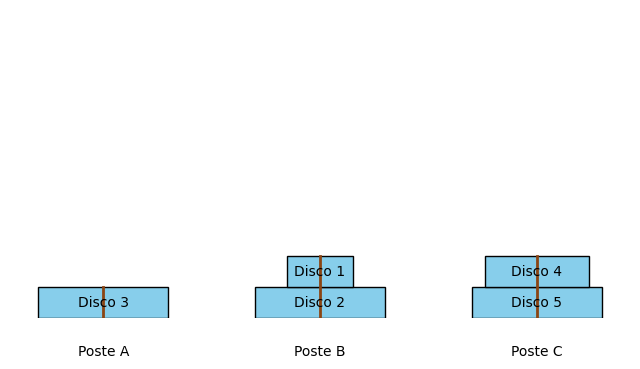

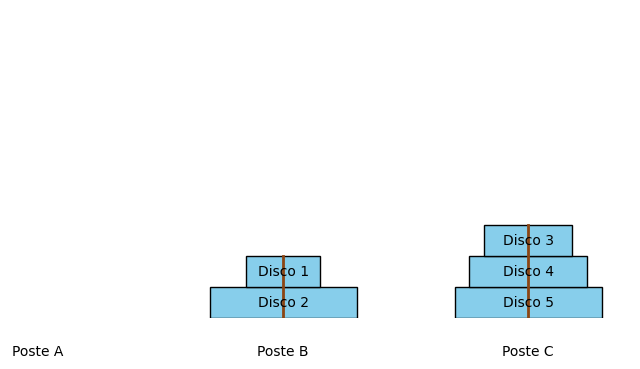

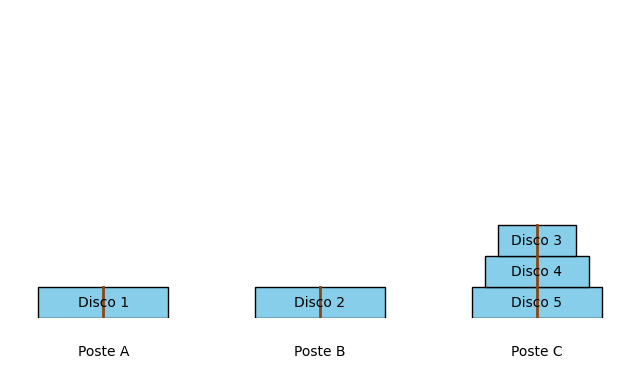

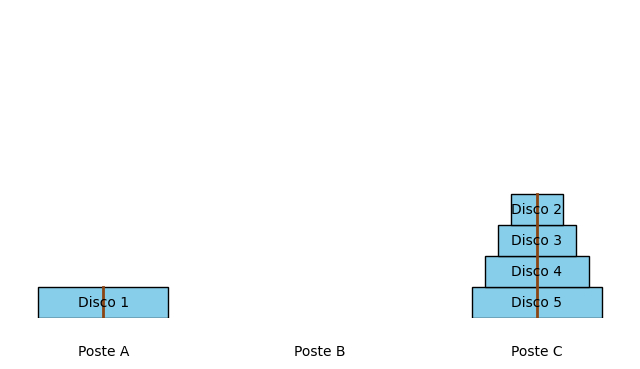

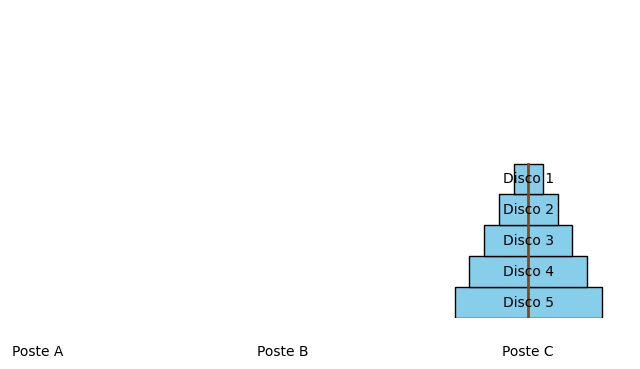

In [64]:
import sys
# Aumentar el límite de recursión a necesidad
sys.setrecursionlimit(1000)

N = 5

posiciones = {
    "A": list(range(N, 0, -1)),
    "B": [],
    "C": []
}

respuesta = TorreDeHanoi(N = N, poste_inicial = 'A', poste_final = 'C', poste_auxiliar = 'B')

for m in respuesta:
    dibujar_torres(posiciones, titulo = None)
    posiciones = movimiento(posiciones_iniciales = posiciones, movimiento = m)
dibujar_torres(posiciones, titulo = None)